In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from elevator_simulation import ElevatorSimulation, run_elevator_simulation_for_lifts

max_num_lifts = 4

In [29]:
# hp cause (test all posible values)
def hp_cause(awt_thr):
    for num_lifts in range(1, max_num_lifts + 1):
        awt = run_elevator_simulation_for_lifts(num_lifts)
        if awt < awt_thr:
            return num_lifts
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'


def hp_cause_mm(awt_thr):
    awt = run_elevator_simulation_for_lifts(max_num_lifts)
    if awt < awt_thr:
        return max_num_lifts # FIXME: use bisect num_lifts
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'

In [27]:
def run_exp(awt_thr):
    tic = time.time()
    hp_cause(awt_thr)
    toc = time.time()
    d_hp = toc - tic

    tic = time.time()
    hp_cause_mm(awt_thr)
    toc = time.time()
    d_hp_mm = toc - tic

    return {'d_hp': d_hp, 'd_hp_mm': d_hp_mm}

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:08<00:00, 12.49it/s]


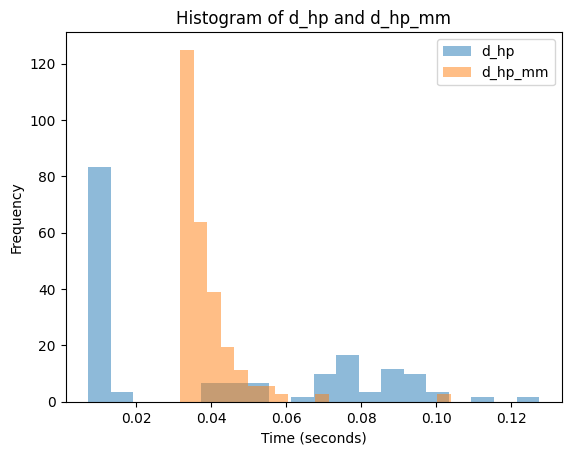

In [32]:
awt_thr_values = np.random.uniform(10, 100, 100)
results = [run_exp(awt_thr) for awt_thr in tqdm(awt_thr_values)]

d_hp_list = [res['d_hp'] for res in results]
d_hp_mm_list = [res['d_hp_mm'] for res in results]

plt.hist(d_hp_list, bins=20, alpha=0.5, label='d_hp', density=True)
plt.hist(d_hp_mm_list, bins=20, alpha=0.5, label='d_hp_mm', density=True)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of d_hp and d_hp_mm')
plt.show()
